# Employee Salaries for Different Job Roles
This dataset provides valuable insights into the compensation and job roles of employees across various industries and regions.

In [90]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [61]:
salary = pd.read_csv('ds_salaries.csv')

In [62]:
salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [63]:
# inspecting the columns

salary.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [64]:
# droping the unnecesary columns

salary.drop(columns=['Unnamed: 0'],inplace=True)

In [65]:
# checking the data type and the nullvalue in each columns

salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [66]:
# double checking the null value

salary.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [67]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 1. Analyzing salary trends across different job titles and experience levels.

In [68]:
# Drop rows with missing salary data

salary = salary.dropna(subset=['salary_in_usd'])

In [69]:
# Average salary by job title
avg_salary_job_title = salary.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Average salary by experience level
avg_salary_experience = salary.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False)

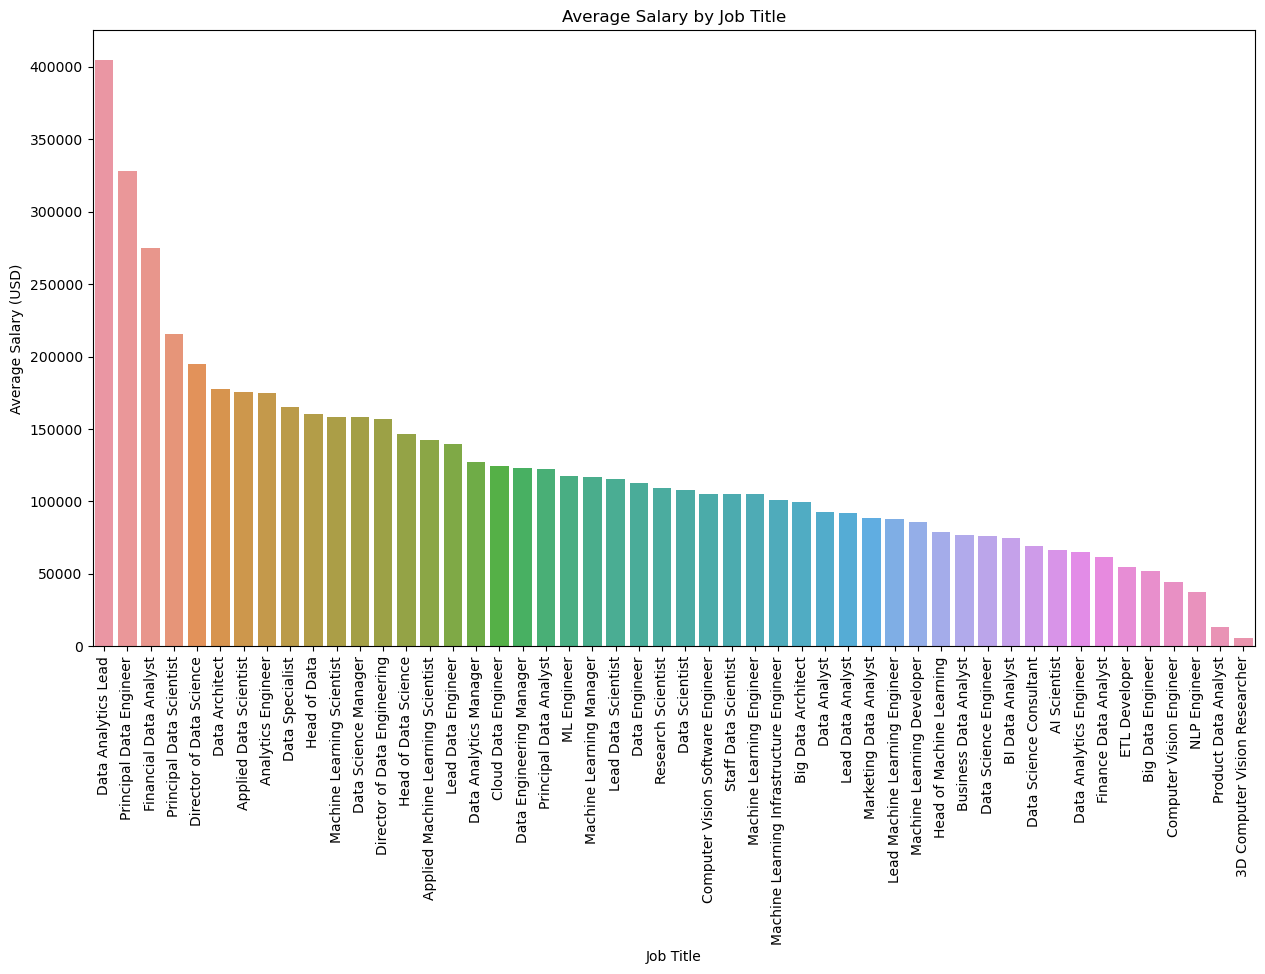

In [70]:
# Plot average salary by job title

plt.figure(figsize=(15, 8))
sns.barplot(x=avg_salary_job_title.index, y=avg_salary_job_title.values)
plt.xticks(rotation=90)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.show()

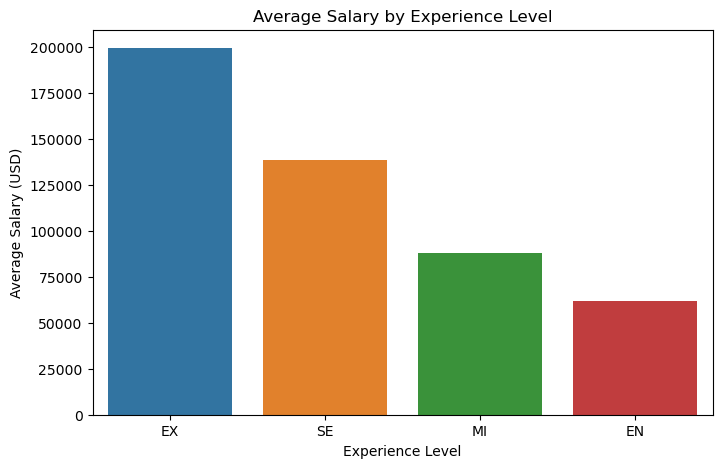

In [71]:
# Plot average salary by experience level

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_experience.index, y=avg_salary_experience.values)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

# Conclusion
This helps to visualize salary trends across different job titles and experience levels, using the 'salary_in_usd' column. This analysis can provide valuable insights for making informed career decisions.

## 2. Investigating the impact of remote work on compensation.

In [73]:
# Average salary by remote ratio
avg_salary_remote_ratio = salary.groupby('remote_ratio')['salary_in_usd'].mean().sort_values(ascending=False)

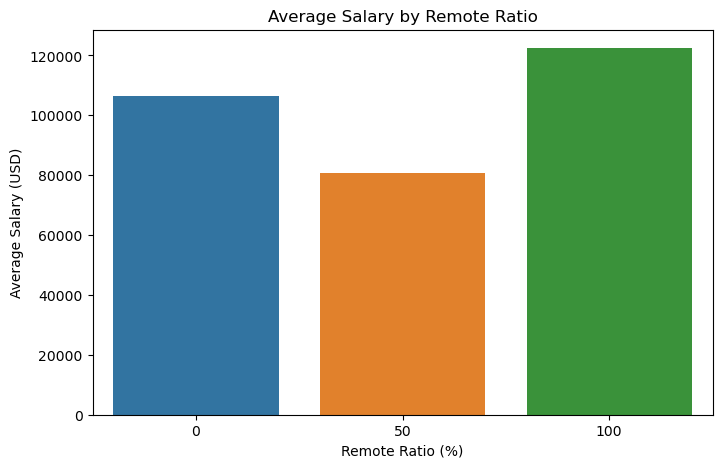

In [74]:
# Plot average salary by remote ratio
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_remote_ratio.index, y=avg_salary_remote_ratio.values)
plt.title('Average Salary by Remote Ratio')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Average Salary (USD)')
plt.show()

In [76]:
# Average salary by remote ratio and job title
avg_salary_remote_job_title = salary.groupby(['remote_ratio', 'job_title'])['salary_in_usd'].mean().unstack()

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


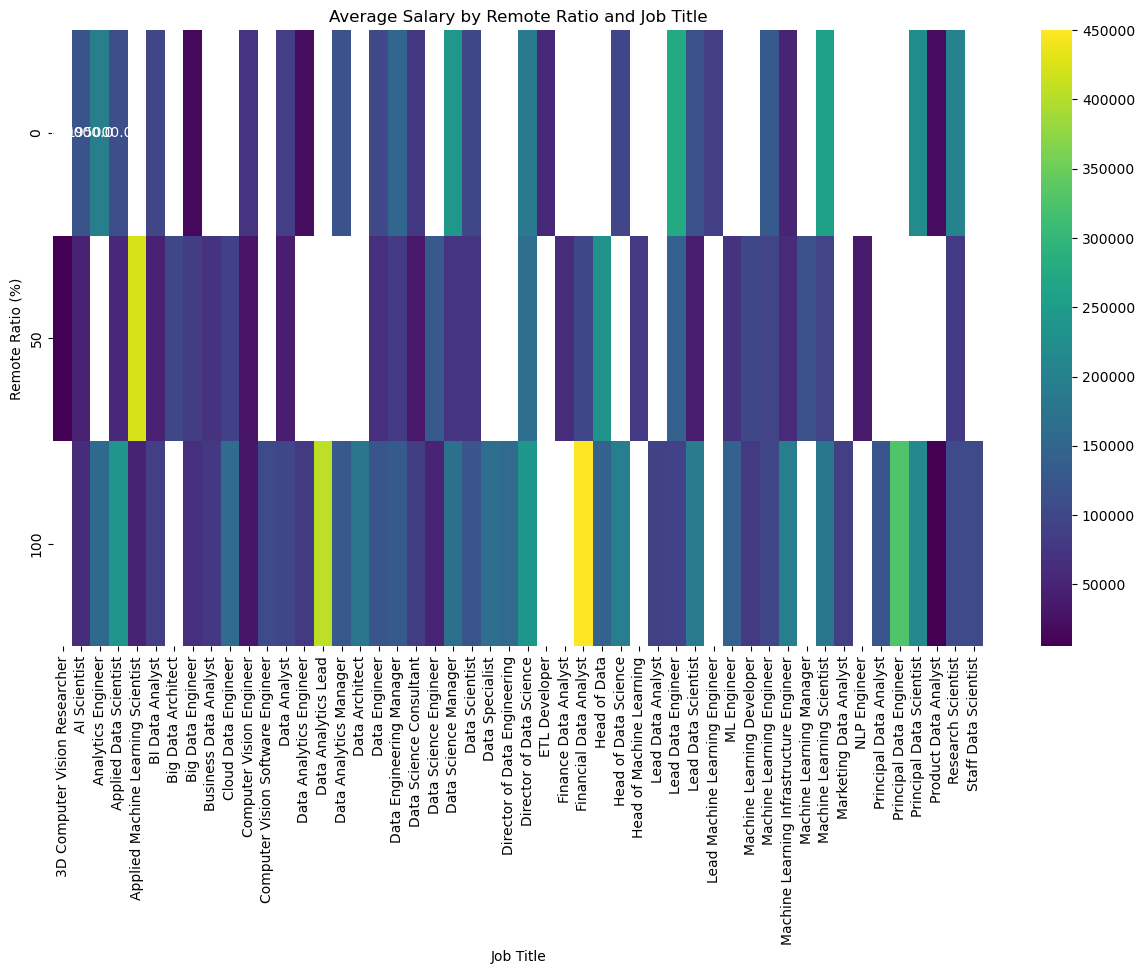

In [77]:
# Plot average salary by remote ratio and job title
plt.figure(figsize=(15, 8))
sns.heatmap(avg_salary_remote_job_title, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Salary by Remote Ratio and Job Title')
plt.xlabel('Job Title')
plt.ylabel('Remote Ratio (%)')
plt.show()

In [78]:
# Average salary by remote ratio and experience level
avg_salary_remote_experience = salary.groupby(['remote_ratio', 'experience_level'])['salary_in_usd'].mean().unstack()

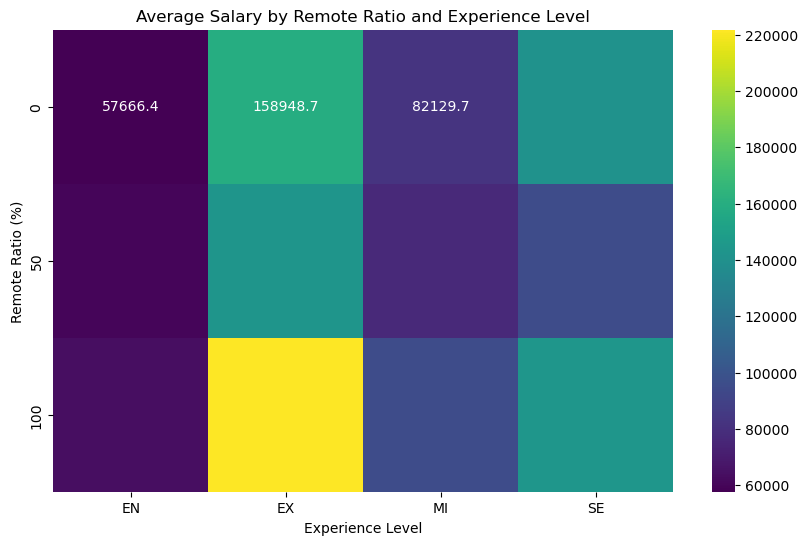

In [79]:
# Plot average salary by remote ratio and experience level
plt.figure(figsize=(10, 6))
sns.heatmap(avg_salary_remote_experience, cmap='viridis', annot=True, fmt=".1f")
plt.title('Average Salary by Remote Ratio and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Remote Ratio (%)')
plt.show()

# Conclusion
This analysis will help to visualize the impact of remote work on compensation across different job titles and experience levels. This analysis can also provide valuable insights for understanding how remote work influences salaries in various roles and experience levels.





## 3. Comparing salary levels between full-time and part-time employment.

In [80]:
# Filtering dataset by employment type

full_time = salary[salary['employment_type'] == 'FT']
part_time = salary[salary['employment_type'] == 'PT']

In [81]:
# Calculating mean salaries

mean_salary_ft = full_time['salary_in_usd'].mean()
mean_salary_pt = part_time['salary_in_usd'].mean()

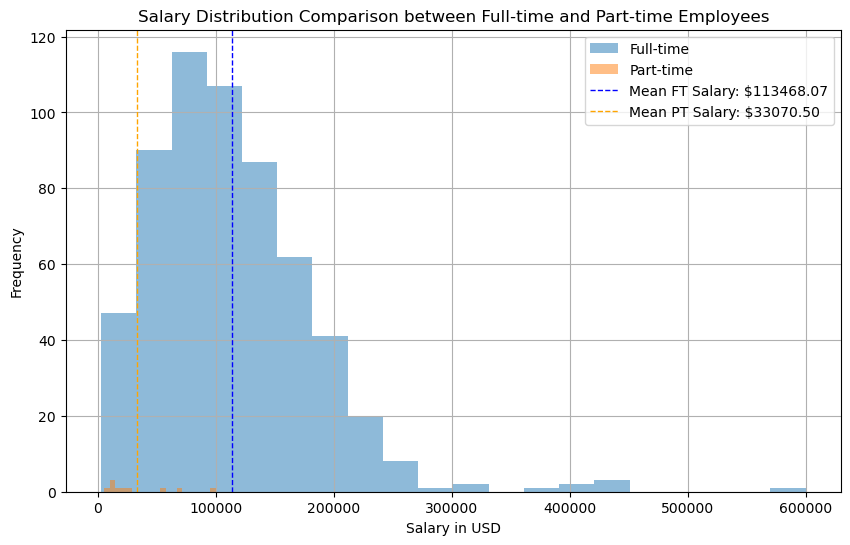

In [82]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(full_time['salary_in_usd'], bins=20, alpha=0.5, label='Full-time')
plt.hist(part_time['salary_in_usd'], bins=20, alpha=0.5, label='Part-time')
plt.axvline(mean_salary_ft, color='b', linestyle='dashed', linewidth=1, label=f'Mean FT Salary: ${mean_salary_ft:.2f}')
plt.axvline(mean_salary_pt, color='orange', linestyle='dashed', linewidth=1, label=f'Mean PT Salary: ${mean_salary_pt:.2f}')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.title('Salary Distribution Comparison between Full-time and Part-time Employees')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
# This is the ststistical comparison

# Performing the t-test
t_stat, p_value = stats.ttest_ind(full_time['salary_in_usd'], part_time['salary_in_usd'])
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

T-statistic: 3.65, p-value: 0.0003


In [85]:
# Interpretation
if p_value < 0.05:
    print("There is a statistically significant difference between the mean salaries of full-time and part-time employees.")
else:
    print("There is no statistically significant difference between the mean salaries of full-time and part-time employees.")

There is a statistically significant difference between the mean salaries of full-time and part-time employees.


# Conclusion:
Based on the statistical comparison using a t-test, there is a significant difference between the mean salaries of full-time and part-time employees. Full-time employees generally earn more than part-time employees, as indicated by the higher mean salary in the full-time group.

## 4. Understanding the correlation between company size and employee salaries.

In [86]:
# Encode company size

size_mapping = {'S': 1, 'M': 2, 'L': 3}
salary['company_size_encoded'] = salary['company_size'].map(size_mapping)

In [87]:
# Calculating correlation

correlation = salary[['company_size_encoded', 'salary_in_usd']].corr().iloc[0, 1]
print(f"Correlation between company size and salary in USD: {correlation:.2f}")

Correlation between company size and salary in USD: 0.15


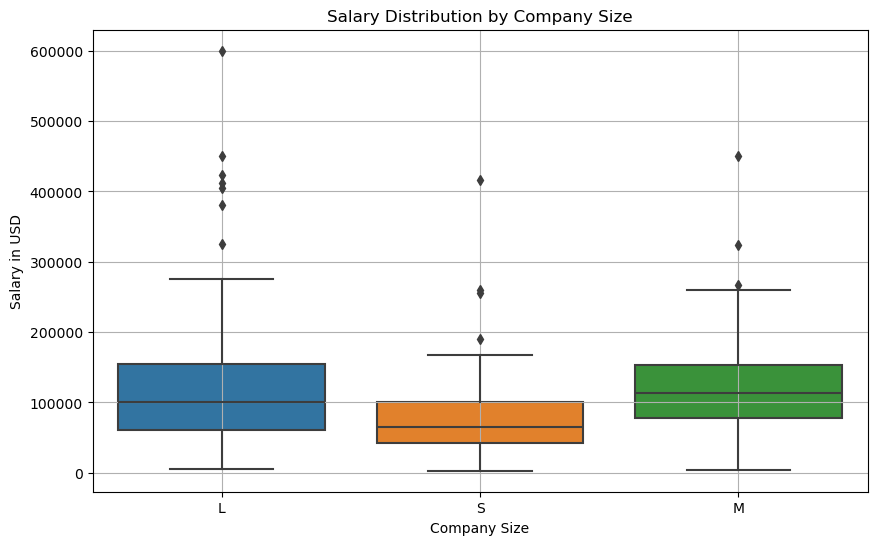

In [88]:
# For better understanding i'm plotting boxplot to visualize the distribution of salaries across different company sizes.

plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=salary)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

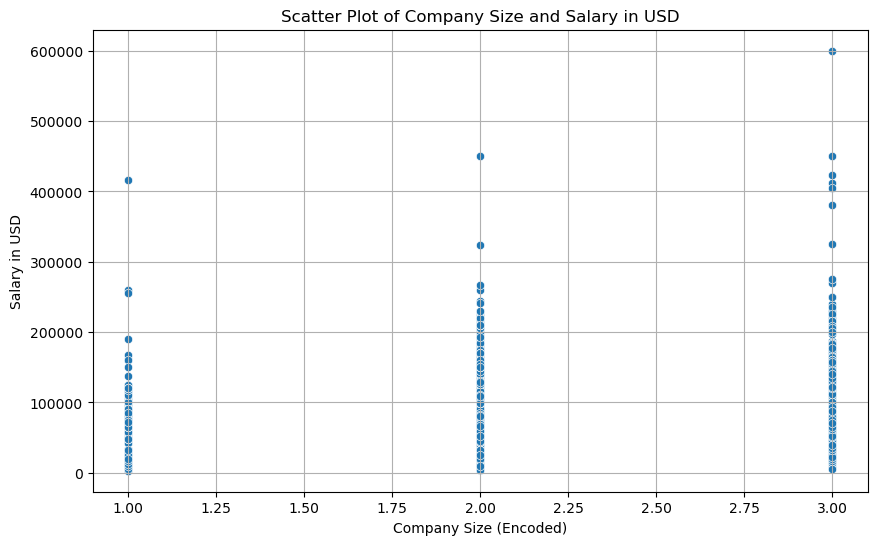

In [89]:
# i'm plotting scatter plot to illustrates the relationship between company size and salary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='company_size_encoded', y='salary_in_usd', data=salary)
plt.title('Scatter Plot of Company Size and Salary in USD')
plt.xlabel('Company Size (Encoded)')
plt.ylabel('Salary in USD')
plt.grid(True)
plt.show()

# Conclusion

All this indicates a moderate positive correlation, suggesting that larger companies tend to pay higher salaries on average.

## 5. Predictive analysis for forecasting salaries based on experience and job roles.

In [92]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_size_encoded
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,3
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,2
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,3


In [94]:
# Encoding the categorical variables
label_encoders = {}
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']


for column in categorical_columns:
    le = LabelEncoder()
    salary[column] = le.fit_transform(salary[column])
    label_encoders[column] = le

In [95]:
# Definning the features and target variable
features = ['experience_level', 'job_title']
target = 'salary_in_usd'

X = salary[features]
y = salary[target]

In [96]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Trainning the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# I'm Making predictions
y_pred = model.predict(X_test)

In [98]:
# Now Evaluating the model

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: ${mae:.2f}")

Mean Absolute Error: $43607.90


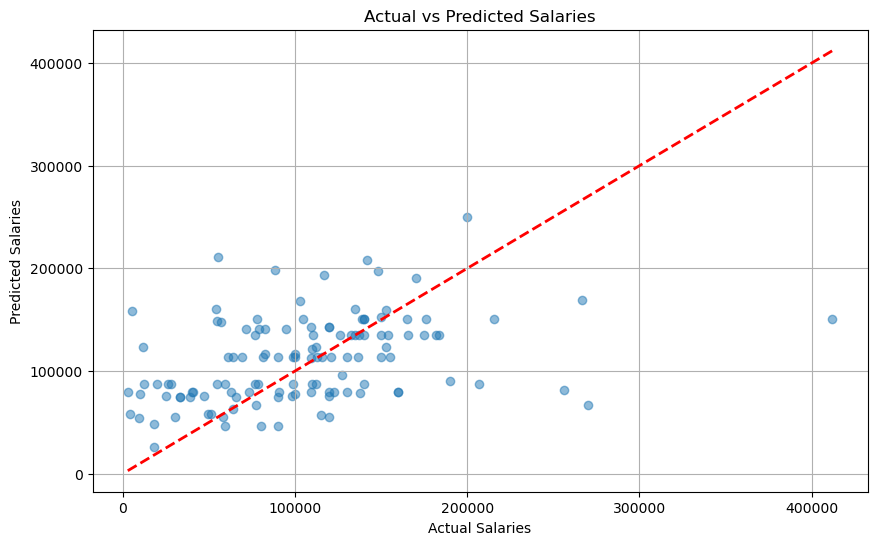

In [99]:
# Ploting the actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')
plt.grid(True)
plt.show()

# Conclusion
Based on the mean absolute error and the plot of actual vs. predicted salaries, you can evaluate how well the model is performing. Lower MAE indicates better performance.